# **Environment Setup and Library Imports**

In [1]:
# Import essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Import machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
from scipy.cluster.hierarchy import dendrogram, linkage

# **Data Loading**

In [2]:
# Load the dataset from a EXCEL file
data = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/E-commerce_data.xlsx', sheet_name=None)
df_customers = data["customers"]
df_transactions = data["transactions"]
df_gender = data["genders"]
df_cities = data["cities"]
df_branches = data["branches"]
df_merchants = data["merchants"]

In [3]:
df_customers_selected = df_customers[['customer_id','city_id','gender_id']]

df_transactions_selected = df_transactions[['customer_id', 'transaction_status', 'transaction_date', 'coupon_name']]


In [4]:
# دمج بيانات العملاء والمعاملات بناءً على "customer_id" باستخدام دمج داخلي (inner join)
merged_data = pd.merge(df_customers_selected, df_transactions_selected, on="customer_id", how="inner")
mrg_data=pd.merge(merged_data,df_gender,on="gender_id",how="inner")
mrg_data=pd.merge(mrg_data,df_cities,on="city_id",how="inner")

# عرض أول 5 صفوف للتأكد من الدمج
print(mrg_data.head())

   customer_id  city_id  gender_id transaction_status transaction_date  \
0            1        7          1         subscribed       2022-07-30   
1            1        7          1             burned       2022-09-19   
2            1        7          1             burned       2022-06-09   
3            1        7          1             burned       2022-07-30   
4            1        7          1         subscribed       2023-03-24   

  coupon_name gender_name city_name  
0     SrP-866        Male  Mansoura  
1     krI-075        Male  Mansoura  
2     quk-137        Male  Mansoura  
3     QiG-754        Male  Mansoura  
4     OtC-985        Male  Mansoura  


In [5]:
mrg_data.drop(columns=['gender_id','city_id'],inplace=True)

# Data Overview:
Check the dataset’s dimensions, data types, and missing values

In [6]:
mrg_data.shape

(5000, 6)

In [7]:
# Display basic information about the data
mrg_data.info()
mrg_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   customer_id         5000 non-null   int64         
 1   transaction_status  5000 non-null   object        
 2   transaction_date    5000 non-null   datetime64[ns]
 3   coupon_name         5000 non-null   object        
 4   gender_name         5000 non-null   object        
 5   city_name           5000 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 234.5+ KB


,customer_id,transaction_date
count,5000.000000,5000
mean,509.551600,2023-10-22 04:38:47.040000
min,1.000000,2021-08-05 00:00:00
25%,262.000000,2023-05-31 18:00:00
50%,514.000000,2024-01-02 00:00:00
75%,758.000000,2024-05-08 00:00:00
max,1000.000000,2024-07-14 00:00:00
std,287.065172,NaN


# Data Cleaning and Preprocessing
Handling Missing Values:
Identify and address missing data.

In [8]:
# Check for missing values
mrg_data.isnull().sum()

,0
customer_id,0
transaction_status,0
transaction_date,0
coupon_name,0
gender_name,0
city_name,0


In [9]:
coupon_usage_total = df_transactions.groupby('customer_id').size().reset_index(name='coupon_usage_frequency')
mrg_data=pd.merge(mrg_data,coupon_usage_total,on="customer_id",how="inner")
mrg_data.head()

,customer_id,transaction_status,transaction_date,coupon_name,gender_name,city_name,coupon_usage_frequency
0,1,subscribed,2022-07-30,SrP-866,Male,Mansoura,7
1,1,burned,2022-09-19,krI-075,Male,Mansoura,7
2,1,burned,2022-06-09,quk-137,Male,Mansoura,7
3,1,burned,2022-07-30,QiG-754,Male,Mansoura,7
4,1,subscribed,2023-03-24,OtC-985,Male,Mansoura,7


In [10]:
mrg_data.drop(columns=['coupon_name'],inplace=True)


In [11]:
mrg_data.drop(columns=['transaction_date'],inplace=True)

In [12]:
mrg_data.describe()

,customer_id,coupon_usage_frequency
count,5000.000000,5000.000000
mean,509.551600,6.077200
std,287.065172,2.264214
min,1.000000,1.000000
25%,262.000000,5.000000
50%,514.000000,6.000000
75%,758.000000,8.000000
max,1000.000000,14.000000


In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
mrg_data['transaction_status'] = le.fit_transform(mrg_data['transaction_status'])
df_encoded = pd.get_dummies(mrg_data, columns=['gender_name', 'city_name'])
df_encoded.head()


,customer_id,transaction_status,coupon_usage_frequency,gender_name_Female,gender_name_Male,city_name_Alexandria,city_name_Aswan,city_name_Asyut,city_name_Beni Suef,city_name_Cairo,...,city_name_Ismailia,city_name_Mansoura,city_name_Minya,city_name_Port Said,city_name_Qena,city_name_Shubra El-Kheima,city_name_Sohag,city_name_Suez,city_name_Tanta,city_name_Zagazig
0,1,1,7,False,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,1,0,7,False,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2,1,0,7,False,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3,1,0,7,False,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
4,1,1,7,False,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False


# **modeling**

# **K-Means Clustering**

In [23]:
X=df_encoded.drop(columns=['customer_id'])


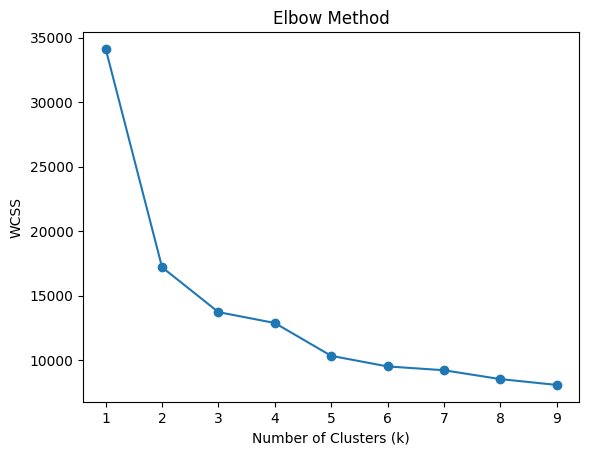

In [24]:
wcss = []
k_values = range(1, 10)

for k in k_values:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X)
    wcss.append(model.inertia_)

# Plot
plt.plot(k_values, wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

In [26]:
model=KMeans(n_clusters=2, random_state=42)
model.fit(X)
#Silhouette Score
print("Silhouette Score:", silhouette_score(df_encoded, model.labels_))
#Davies-Bouldin Index
print("Davies-Bouldin Index:", davies_bouldin_score(df_encoded, model.labels_))

Silhouette Score: -0.002098726467221182
Davies-Bouldin Index: 106.82444779487457


In [36]:
df_encoded['cluster'] = model.labels_


,count
cluster,
0,3160
1,1840


# ** DBSCAN (Density-Based Clustering)**

In [31]:
model_dbscan=DBSCAN()
model_dbscan.fit(X)

#Silhouette Score
print("Silhouette Score:", silhouette_score(X, model_dbscan.labels_))
#Davies-Bouldin Index
print("Davies-Bouldin Index:", davies_bouldin_score(df_encoded, model_dbscan.labels_))

Silhouette Score: 0.81624315014671
Davies-Bouldin Index: 147.32011246076576


# ** Hierarchical Clustering**

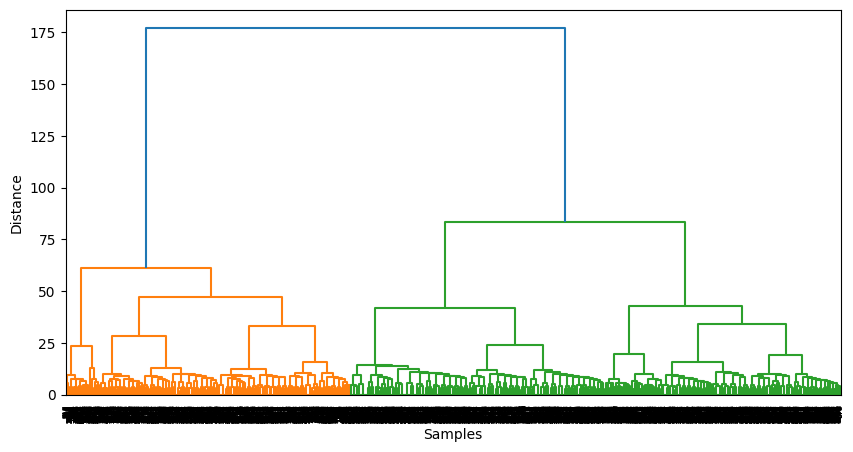

Silhouette Score: 0.3592248816902089
Davies-Bouldin Index: 106.01848967028788


In [32]:

model=AgglomerativeClustering()
model.fit(X)

plt.figure(figsize=(10, 5))
dendrogram(linkage(X, method='ward'))

plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()
#Silhouette Score
print("Silhouette Score:", silhouette_score(X, model.labels_))
#Davies-Bouldin Index
print("Davies-Bouldin Index:", davies_bouldin_score(df_encoded, model.labels_))